# Student Loan Risk with Deep Learning

In [1]:
# Imports
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from pathlib import Path

---

## Prepare the data to be used on a neural network model

### Step 1: Read the `student-loans.csv` file into a Pandas DataFrame. Review the DataFrame, looking for columns that could eventually define your features and target variables.   

In [2]:
# Read the csv into a Pandas DataFrame
file_path = "https://static.bc-edx.com/ai/ail-v-1-0/m18/lms/datasets/student-loans.csv"
loans_df = pd.read_csv(file_path)

# Review the DataFrame
loans_df.head()

,payment_history,location_parameter,stem_degree_score,gpa_ranking,alumni_success,study_major_code,time_to_completion,finance_workshop_score,cohort_ranking,total_loan_score,financial_aid_score,credit_ranking
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [3]:
# Review the data types associated with the columns
loans_df.dtypes

payment_history           float64
location_parameter        float64
stem_degree_score         float64
gpa_ranking               float64
alumni_success            float64
study_major_code          float64
time_to_completion        float64
finance_workshop_score    float64
cohort_ranking            float64
total_loan_score          float64
financial_aid_score       float64
credit_ranking              int64
dtype: object

In [4]:
# Check the credit_ranking value counts
loans_df["credit_ranking"].value_counts()

credit_ranking
1    855
0    744
Name: count, dtype: int64

### Step 2: Using the preprocessed data, create the features (`X`) and target (`y`) datasets. The target dataset should be defined by the preprocessed DataFrame column “credit_ranking”. The remaining columns should define the features dataset.

In [5]:
y = loans_df[["credit_ranking"]]
# Display a sample of y
y.head(5)

,credit_ranking
0,0
1,0
2,0
3,1
4,0


In [6]:
# Define features set X by selecting all columns but credit_ranking
X = loans_df.drop( columns=["credit_ranking"])

# Review the features DataFrame
X.head()


,payment_history,location_parameter,stem_degree_score,gpa_ranking,alumni_success,study_major_code,time_to_completion,finance_workshop_score,cohort_ranking,total_loan_score,financial_aid_score
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


### Step 3: Split the features and target sets into training and testing datasets.


In [7]:
# Split the preprocessed data into a training and testing dataset
# Assign the function a random_state equal to 1

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Step 4: Use scikit-learn's `StandardScaler` to scale the features data.

In [8]:
# Create a StandardScaler instance
ss = StandardScaler()


# Fit the scaler to the features training dataset
ss.fit(X_train)


# Fit the scaler to the features training 

X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

In [9]:
X_train_scaled.shape

(1199, 11)

---

## Compile and Evaluate a Model Using a Neural Network

### Step 1: Create a deep neural network by assigning the number of input features, the number of layers, and the number of neurons on each layer using Tensorflow’s Keras.

> **Hint** You can start with a two-layer deep neural network model that uses the `relu` activation function for both layers.


In [10]:
# Define the the number of inputs (features) to the model

n_features = len(X_train.columns) 


# Review the number of features
print(n_features)

11


In [11]:
# Define the number of hidden nodes for the first hidden layer

n_first_neurons = (3*n_features +1)


# Define the number of hidden nodes for the second hidden layer
n_second_neurons = (2*n_features +1)


# Define the number of neurons in the output layer
n_output_nodes = 1

In [12]:
# Create the Sequential model instance

model_nl = tf.keras.models.Sequential()

# Add the first hidden layer
model_nl.add(tf.keras.layers.Dense(units=n_first_neurons, activation="relu", input_dim=n_features))

# Add the second hidden layer
model_nl.add(tf.keras.layers.Dense(units=n_second_neurons, activation="leaky_relu"))

# Add the output layer to the model specifying the number of output neurons and activation function
model_nl.add(tf.keras.layers.Dense(units=n_output_nodes, activation="sigmoid"))


C:\Users\deepa\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Display the Sequential model summary
model_nl.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 34)             │           408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 23)             │           805 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            24 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,237 (4.83 KB)

 Trainable params: 1,237 (4.83 KB)

 Non-trainable params: 0 (0.00 B)

### Step 2: Compile and fit the model using the `binary_crossentropy` loss function, the `adam` optimizer, and the `accuracy` evaluation metric.


In [14]:
# Compile the Sequential model
model_nl.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [15]:
print(X_train_scaled.shape)
print(y_train.shape)

print(y_train.value_counts())

(1199, 11)
(1199, 1)
credit_ranking
1                 643
0                 556
Name: count, dtype: int64


In [16]:
# Fit the model using 50 epochs and the training data
fit_model = model_nl.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5555 - loss: 0.6855
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6714 - loss: 0.5956
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7275 - loss: 0.5403
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7401 - loss: 0.5253
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7374 - loss: 0.5203
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7556 - loss: 0.5173
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7585 - loss: 0.4823
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7694 - loss: 0.4890
Epoch 9/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7413 - loss: 0.4998
Epoch 10/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7611 - loss: 0.5001
Epoch 11/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7755 - loss: 0.4604
Epoch 12/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7596 - lo

### Step 3: Evaluate the model using the test data to determine the model’s loss and accuracy.


In [17]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = model_nl.evaluate(X_test_scaled, y_test, verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


13/13 - 1s - 56ms/step - accuracy: 0.7600 - loss: 0.5191
Loss: 0.5190534591674805, Accuracy: 0.7599999904632568


<Axes: >

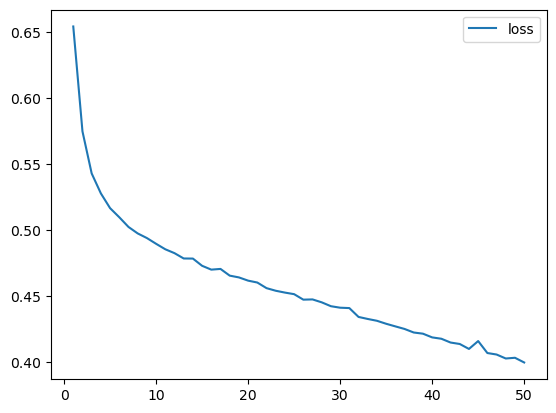

In [18]:
df_history = pd.DataFrame(fit_model.history)
df_history.index +=1

#df_history
df_history.plot(y='loss')

<Axes: >

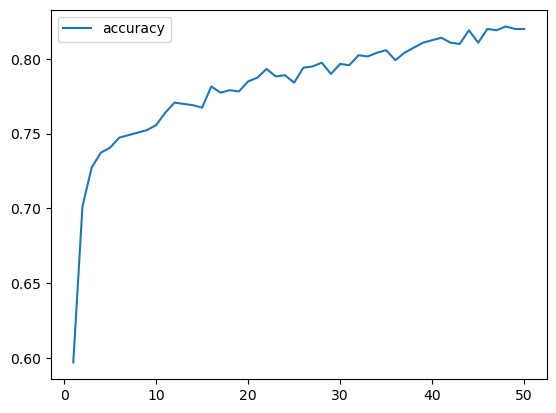

In [19]:

df_history.plot(y='accuracy')

### Step 4: Save and export your model to a keras file, and name the file `student_loans.keras`.


In [20]:
# Set the model's file path
model_file_path = Path("student_loans.keras")

# Export your model to a keras file
model_nl.save(model_file_path)


---
## Predict Loan Repayment Success by Using your Neural Network Model

### Step 1: Reload your saved model.

In [21]:
# Set the model's file path

model_load_file_path = Path("student_loans.keras")

# Load the model to a new object
nn_imported = tf.keras.models.load_model(model_load_file_path)


### Step 2: Make predictions on the testing data and save the predictions to a DataFrame.

In [22]:
# Make predictions with the test data
y_predict = nn_imported.predict(X_test_scaled, batch_size=None, verbose="auto", steps=None, callbacks=None)

# Display a sample of the predictions
print(y_predict[1])


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[0.29335803]


In [23]:
import numpy as np

# Save the predictions to a DataFrame and round the predictions to binary results
prediction_df = pd.DataFrame({'Predicted': [np.round(x[0]).astype(int) for x in y_predict] })

prediction_df.head()


,Predicted
0,0
1,0
2,1
3,1
4,1


### Step 4: Display a classification report with the y test data and predictions

In [24]:
# Print the classification report with the y test data and predictions

print(classification_report(y_test, prediction_df))


              precision    recall  f1-score   support

           0       0.73      0.78      0.75       188
           1       0.79      0.74      0.77       212

    accuracy                           0.76       400
   macro avg       0.76      0.76      0.76       400
weighted avg       0.76      0.76      0.76       400



In [25]:
loans_df.corr()['credit_ranking'].sort_values()

location_parameter       -0.321441
time_to_completion       -0.231963
finance_workshop_score   -0.159110
alumni_success           -0.109494
study_major_code         -0.061757
cohort_ranking           -0.003264
gpa_ranking              -0.002160
payment_history           0.095093
stem_degree_score         0.159129
total_loan_score          0.218072
financial_aid_score       0.434751
credit_ranking            1.000000
Name: credit_ranking, dtype: float64

---
## Discuss creating a recommendation system for student loans

Briefly answer the following questions in the space provided:

1. Describe the data that you would need to collect to build a recommendation system to recommend student loan options for students. Explain why this data would be relevant and appropriate.

2. Based on the data you chose to use in this recommendation system, would your model be using collaborative filtering, content-based filtering, or context-based filtering? Justify why the data you selected would be suitable for your choice of filtering method.

3. Describe two real-world challenges that you would take into consideration while building a recommendation system for student loans. Explain why these challenges would be of concern for a student loan recommendation system.

**1. Describe the data that you would need to collect to build a recommendation system to recommend student loan options for students. Explain why this data would be relevant and appropriate.**


**2. Based on the data you chose to use in this recommendation system, would your model be using collaborative filtering, content-based filtering, or context-based filtering? Justify why the data you selected would be suitable for your choice of filtering method.**


**3. Describe two real-world challenges that you would take into consideration while building a recommendation system for student loans. Explain why these challenges would be of concern for a student loan recommendation system.**



Features like payment_history, stem_degree_score, total_loan_score and financial_aid_score are playing important role in the model. These features are related to the financial history of the student. The model is also considering the student's academic performance. Apart from these, may be the model is also considering the student's demographic information like age, gender, race etc. Also Loan Data like loan_amount, loan_term, loan_status etc. are also playing important role in the model.

To build student loan recommendation system, the model would primarily utilize Collaborative Filtering (CF) technique. The model would identify patterns and relationships between students with similar characteristics and loan history. This would enable the model to recommend loans based on the preferences and behavior of similar students.

To fine tune this model, there should be some feedback kind of mechanism where the students can rate the loan they have taken as well as the lender. This would help the model to learn from the past and improve its recommendation over time.
